### Preprocessing part

**Import libraries**

In [3]:
# data manipulation
import numpy as np
import pandas as pd

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# ML
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder


from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import cross_validate
from sklearn.metrics import f1_score

**Upload data**

In [4]:
data_sepsis = pd.read_csv("/content/data-sepsis.csv", sep=";")


### Exploratory Data Analysis

In [5]:
data_sepsis.head(15).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
HR,103.00,58.00,91.00,92.00,155.50,73.00,NaN,82.00,89.00,100.00,95.00,86.00,88.00,116.00,110.00
O2Sat,90.00,95.00,94.00,100.00,94.50,99.00,NaN,100.00,100.00,95.00,100.00,96.00,100.00,97.00,99.00
Temp,NaN,36.11,38.50,NaN,NaN,36.06,NaN,35.50,NaN,37.28,NaN,38.00,36.30,38.28,36.40
SBP,NaN,143.00,133.00,NaN,147.50,100.00,NaN,112.00,141.00,121.00,89.00,111.00,99.00,200.00,116.00
MAP,NaN,77.00,74.00,NaN,102.00,67.00,NaN,79.50,85.00,20.00,62.33,66.00,66.00,108.00,219.00
DBP,NaN,47.00,48.00,NaN,NaN,49.50,NaN,63.00,57.00,NaN,NaN,49.00,52.00,90.00,66.00
Resp,30.00,11.00,34.00,NaN,33.00,16.50,NaN,14.00,17.00,NaN,18.00,17.00,16.00,24.00,19.00
EtCO2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BaseExcess,21.00,NaN,NaN,NaN,-12.00,-8.00,0.00,0.00,1.00,NaN,NaN,1.00,-3.00,6.00,-8.00
HCO3,45.00,22.00,31.00,29.00,13.00,16.00,25.00,23.00,25.00,22.00,22.00,27.00,20.00,NaN,19.00


Dataset contains data of 36 thousand patients. Each patient is represented by 41 features.

In [6]:
data_sepsis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36302 entries, 0 to 36301
Data columns (total 41 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HR                35506 non-null  float64
 1   O2Sat             34736 non-null  float64
 2   Temp              17101 non-null  float64
 3   SBP               34617 non-null  float64
 4   MAP               34846 non-null  float64
 5   DBP               27917 non-null  float64
 6   Resp              33890 non-null  float64
 7   EtCO2             1613 non-null   float64
 8   BaseExcess        7184 non-null   float64
 9   HCO3              16984 non-null  float64
 10  FiO2              6427 non-null   float64
 11  pH                9221 non-null   float64
 12  PaCO2             8430 non-null   float64
 13  SaO2              4335 non-null   float64
 14  AST               10391 non-null  float64
 15  BUN               32526 non-null  float64
 16  Alkalinephos      10269 non-null  float6

In [7]:
data_sepsis.isna().sum(axis = 0).sort_values(ascending=False) / len(data_sepsis) * 100

Bilirubin_direct    96.881715
EtCO2               95.556719
Fibrinogen          94.102253
TroponinI           89.681009
Lactate             88.612198
SaO2                88.058509
FiO2                82.295741
BaseExcess          80.210457
PaCO2               76.778139
pH                  74.599196
Alkalinephos        71.712302
Bilirubin_total     71.591097
AST                 71.376233
PTT                 61.778965
HCO3                53.214699
Temp                52.892403
Chloride            52.165170
Phosphate           40.036362
Unit2               38.788497
Unit1               38.788497
Magnesium           23.775550
DBP                 23.097901
Calcium             21.153105
WBC                 13.338108
Platelets           13.313316
Hgb                 12.357446
Hct                 11.354746
Creatinine          11.134373
BUN                 10.401631
Potassium            9.897526
Glucose              8.387968
Resp                 6.644262
SBP                  4.641618
O2Sat     

In [8]:
data_sepsis.nunique()

HR                    248
O2Sat                  69
Temp                  292
SBP                   427
MAP                   537
DBP                   253
Resp                  132
EtCO2                  91
BaseExcess            134
HCO3                  118
FiO2                   57
pH                     80
PaCO2                 269
SaO2                  216
AST                   916
BUN                   200
Alkalinephos          547
Calcium               408
Chloride               69
Creatinine           1072
Bilirubin_direct      165
Glucose               751
Lactate               585
Magnesium              69
Phosphate             149
Potassium             243
Bilirubin_total       252
TroponinI             871
Hct                   552
Hgb                   248
PTT                   938
WBC                   576
Fibrinogen            580
Platelets             788
Age                  5835
Gender                  2
Unit1                   2
Unit2                   2
HospAdmTime 

In [9]:
data_sepsis.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
HR,35506.0,83.547246,17.486670,26.00,71.00,82.000,94.0000,184.00
O2Sat,34736.0,97.444337,2.827282,27.00,96.00,98.000,100.0000,100.00
Temp,17101.0,36.824187,0.855630,26.67,36.30,36.800,37.3900,41.80
SBP,34617.0,122.625064,23.092558,32.00,106.00,120.000,137.0000,281.00
MAP,34846.0,82.263649,16.876642,20.00,71.00,80.000,91.3300,291.00
DBP,27917.0,63.793506,14.130816,22.00,54.00,62.000,72.0000,281.00
Resp,33890.0,18.041841,5.020912,1.00,15.00,18.000,20.5000,59.00
EtCO2,1613.0,32.402046,7.947214,10.00,28.00,33.000,37.5000,97.00
BaseExcess,7184.0,-0.306508,4.151943,-29.00,-2.00,0.000,2.0000,36.00
HCO3,16984.0,24.255841,4.150083,5.00,22.00,24.000,26.0000,55.00


Compute share of missing values for each feature (%):

In [10]:
data_sepsis["isSepsis"].value_counts()

0    33655
1     2647
Name: isSepsis, dtype: int64

### Early summary:
+ Most of the features are continuous with only **gender**, **Unit1**, **Unit2**, and target **isSepsis** represented by discrete values. In total 39 continuous features, 2 categorical.
+ A lot of features miss more than half of values, with **Bilirubin_direct** missing as much as 97%. We may expect that these rare values were measured because some kind of abnormality was expected hence non-missing values may be non-representative of the total population.
+ A lot of negative values in **HospAdmTime** which probably means that the patient was first delivered to ICU and some time later released from ICU to a hospital. Positive values mean that the patient has gotten to ICU after spending some time in a hospital. This is just an assumption, however, an should be checked.
+ **Unit1** and **Unit2** stand for ICU units. Based on them we can find out, whether that person has had to be put in MICU (medical intensive care unit) or SICU (surgical intensive care unit).
+ Septic patients constitute only 7% of the total dataset we have to take this into account when selecting a model

---

Now we should split the data into train and test data and put test data aside until we have a trained model.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(data_sepsis.drop("isSepsis", axis=1), data_sepsis["isSepsis"], test_size=0.1, random_state=42)

---

### Data visualisation

In [12]:
# set plots style
sns.set_theme(context="notebook", style="whitegrid", palette="tab10")

### Visualise **vital signs**:

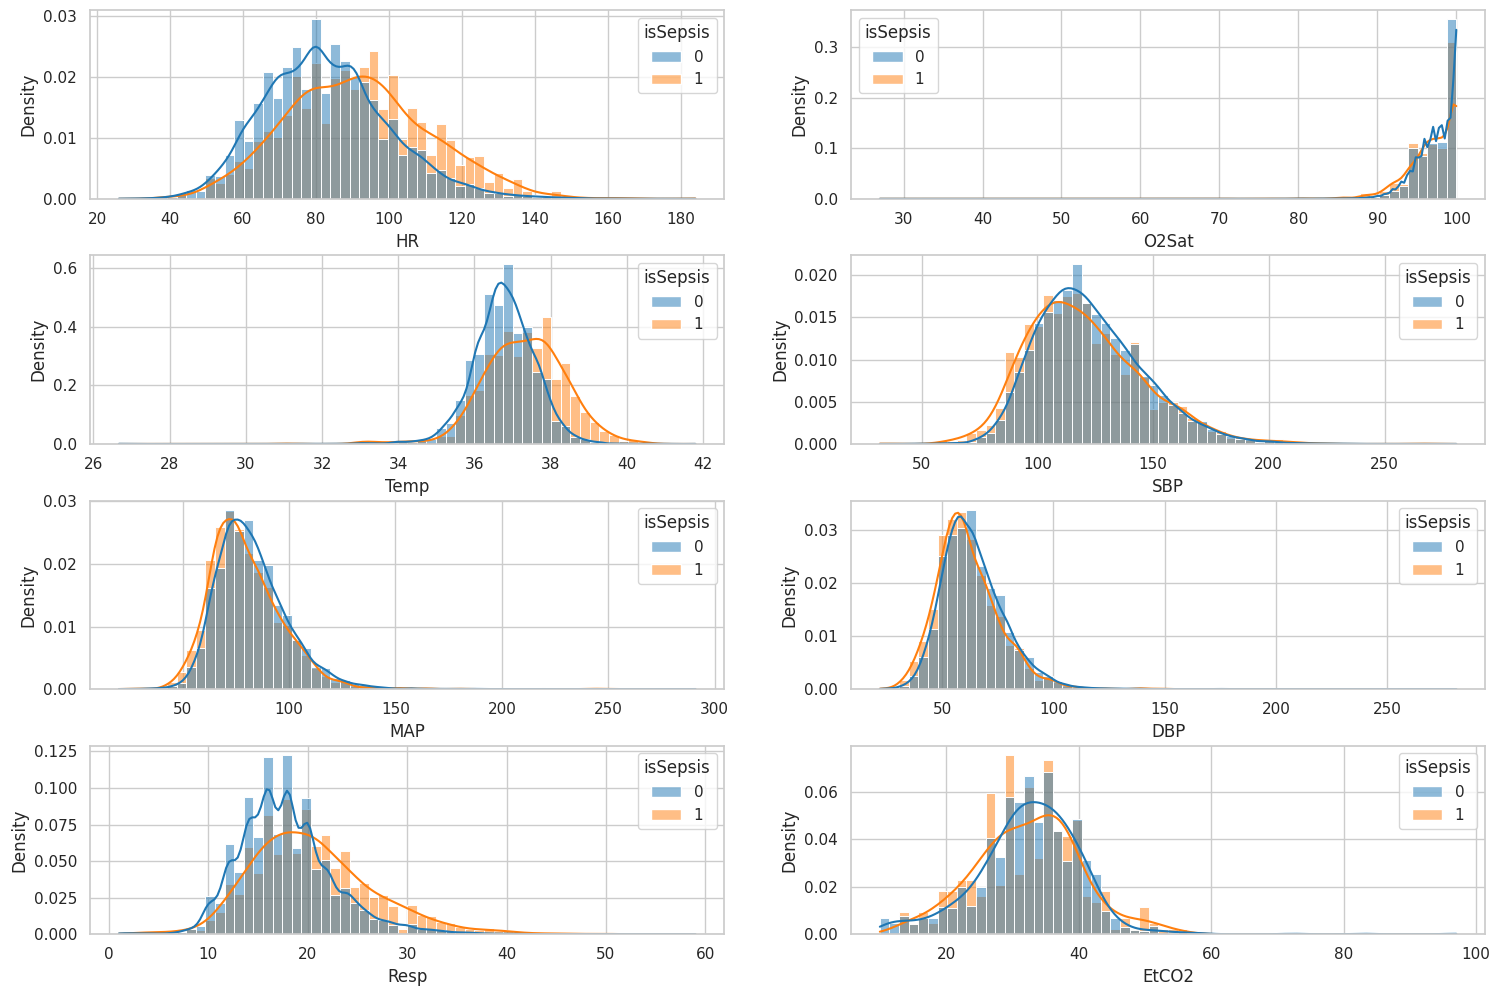

In [13]:
#X_train.columns

vital_signs = ["HR", "O2Sat", "Temp", "SBP", "MAP", "DBP", "Resp", "EtCO2"]

plt.figure(figsize = (18,12))
plt.subplots_adjust(hspace = .3)
for i, column in enumerate(vital_signs, 1):
    plt.subplot(4,2,i)
    sns.histplot(data = X_train,
                 x = column,
                 hue = y_train,
                 stat = "density",
                 common_norm = False,
                 bins = 60,
                 kde = True)

#plt.savefig("vital_signs.png", dpi=400)

### Visualize **laboratory values**:

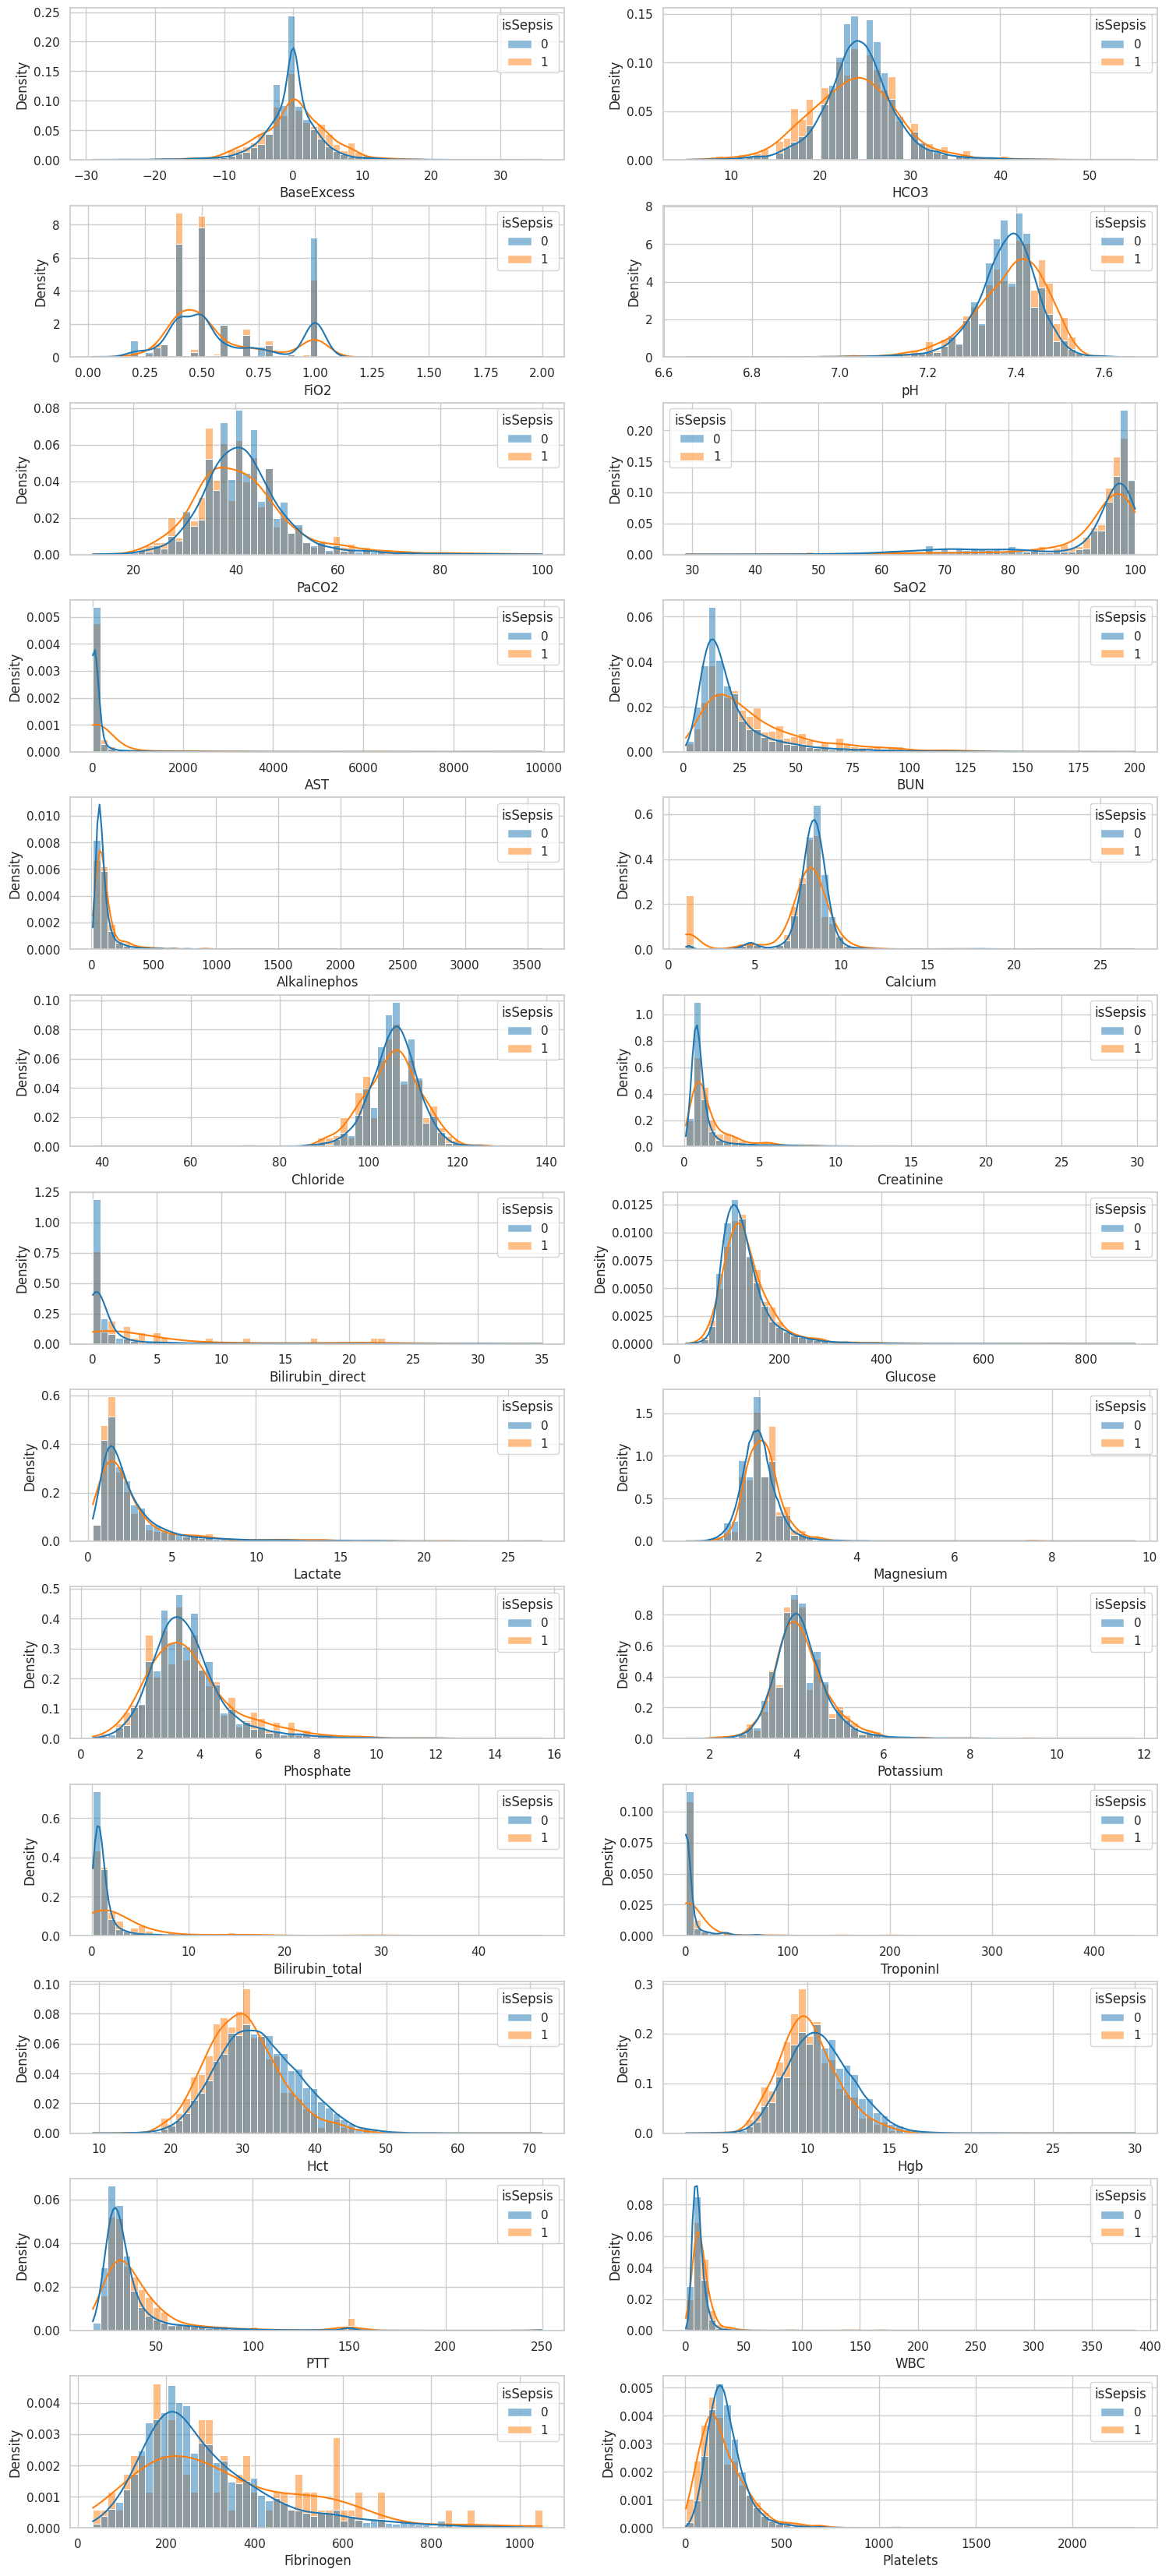

In [14]:
#X_train.columns

lab_values = ['BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN',
       'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct',
       'Glucose', 'Lactate', 'Magnesium', 'Phosphate', 'Potassium',
       'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
       'Fibrinogen', 'Platelets']

plt.figure(figsize = (18,42))
plt.subplots_adjust(hspace = .3)
for i, column in enumerate(lab_values, 1):
    plt.subplot(13, 2, i)
    sns.histplot(data = X_train,
                 x = column,
                 hue = y_train,
                 stat = "density",
                 bins = 60,
                 common_norm = False,
                 kde = True)

#plt.savefig("lab_values.png", dpi=400)

### Visualise **demographics:**

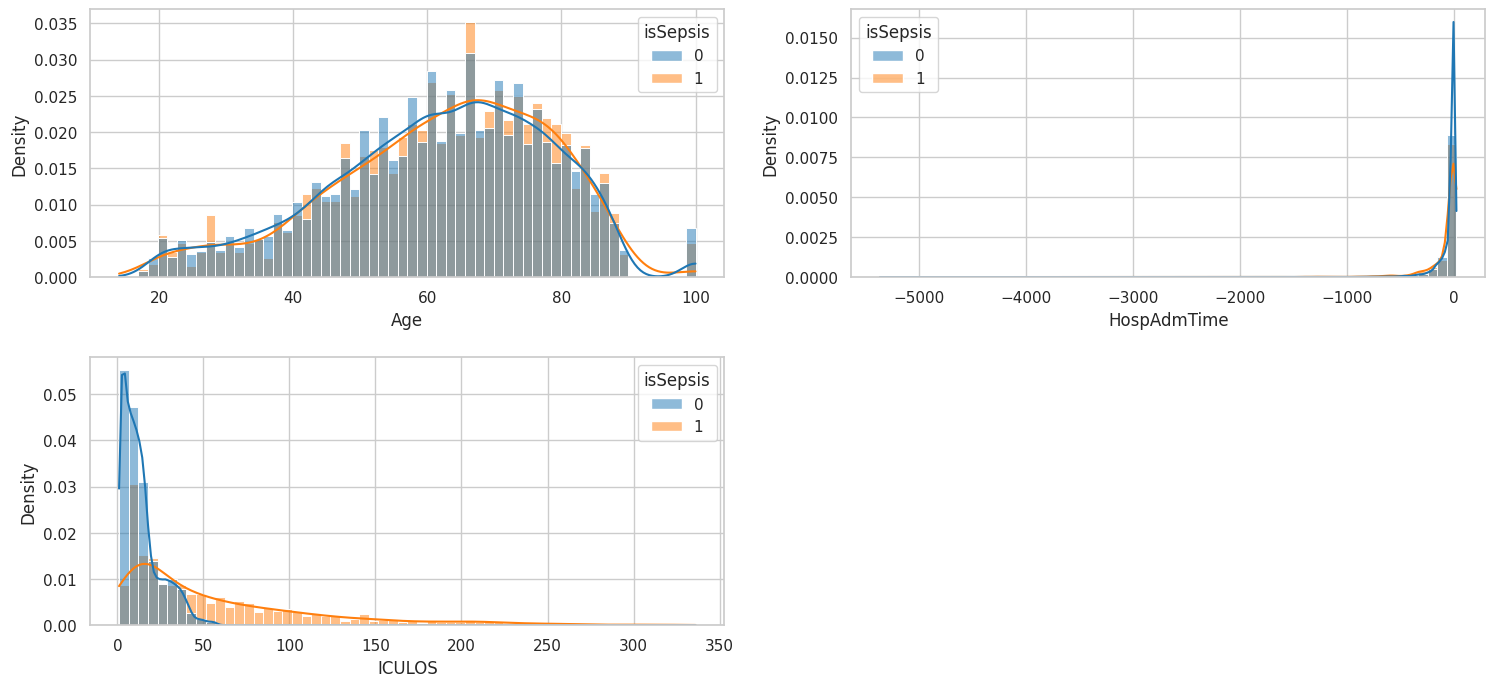

In [15]:
#X_train.columns

demographics = ["Age", "HospAdmTime", "ICULOS"]

plt.figure(figsize = (18,8))
plt.subplots_adjust(hspace = .3)
for i, column in enumerate(demographics, 1):
    plt.subplot(2,2,i)
    sns.histplot(data = X_train,
                 x = column,
                 hue = y_train,
                 stat = "density",
                 bins = 60,
                 common_norm = False,
                 kde = True)

#plt.savefig("demographics.png", dpi=400)

In [16]:
def plotGender(data):
    gender = data
    gender[gender == 0] = "female"
    gender[gender == 1] = "male"

    sns.countplot(x = gender, hue = y_train, dodge = False)


def plotUnit(data):
    Unit1 = data["Unit1"][data["Unit1"]==1].count() # patients in Unit1
    Unit2 = data["Unit2"][data["Unit2"]==1].count() # patients in Unit2
    totalNa = len(data["Unit1"][(data["Unit1"].isna()) & (data["Unit2"].isna())])

    sns.barplot(x = ["Medical ICU","Surgical ICU","Not Given"],
                y=[Unit1, Unit2, totalNa])

<ipython-input-16-900ebe2c18a7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gender[gender == 0] = "female"


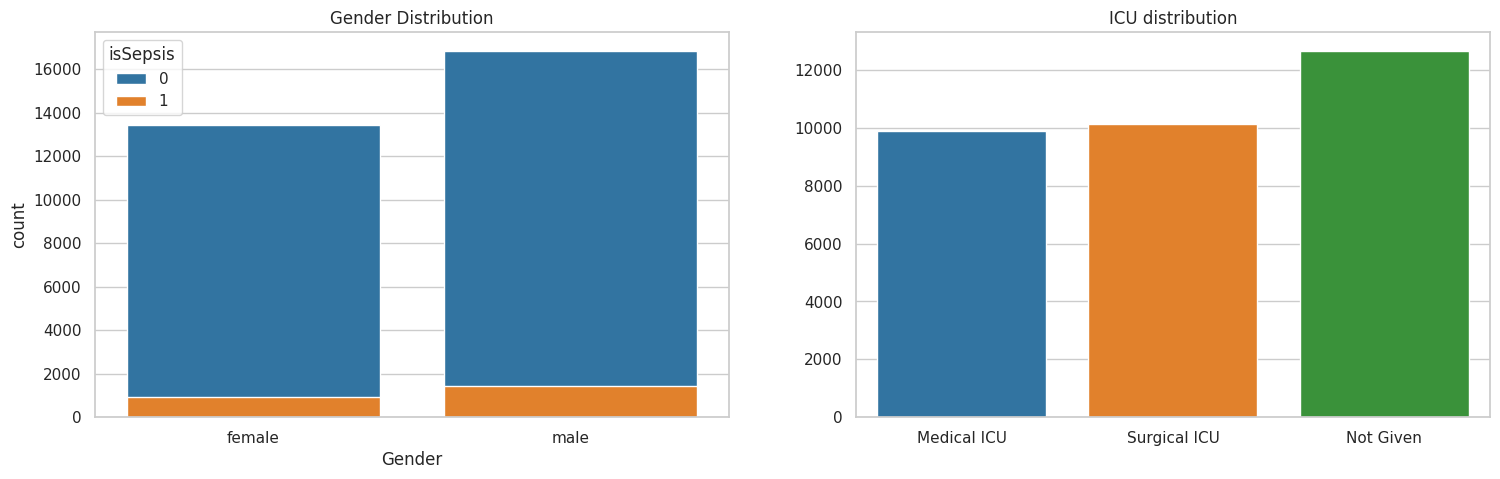

In [17]:
plt.figure(figsize = (18,5))
plt.subplot(1,2,1)
plt.title("Gender Distribution")
plotGender(X_train["Gender"])
plt.subplot(1,2,2)
plt.title("ICU distribution")
plotUnit(X_train)

#plt.savefig("additional.png", dpi=400)

### Observations
**Vital signs:**
+ **HR**, **Temp**, and **Resp** seem to differ between septic and non-septic patients
+ The rest of the attributes don't differ and may be irrelevant in terms of sepsis prediction <br>

**Laboratory values:**
+ Despite having similar mean, feature **BaseExcess** appears to deviate higher from the mean for septic patients, it is possible that abnormal concentration of excess bicarbonate is inherent to septic patients
+ **FiO2** is represented by somewhat discrete values with bimodal distribution. This and the fact that just about 20% of the patients have record of this value makes this features likely to be diregarded as non-representative
+ **pH** of septic patients appears to be higher (more basic pH)
+ **BUN** also appears to be higher in concentrations for sepsis-positive patients
+ **Calcium** concentration, although similar for septic and non-septic patients, has outliers for septic patients at very low concentrations. We may want to investigate this further
+ **Bilirubin_direct** looks to be higher for septic patients, but we have to keep in mind that more than 96% of the patients lack this attribute. Nontheless, it is possible though that bilirubin concentration was measured only if doctors suspected this attribute to be abnormal and we there are indeed some very high concentration for septic patients
+ **Bilirubin_total** is higher for septic patients as well. Worth noting, that total bilirubin concentration is defined as the sum of **Bilirubin_direct** and indirect bilirubin. Therefore we may expect this feature to be strongly correlated with **Bilirubin_direct**
+ **Hct** and **Hgb** values seem to be slightly lower in concentrations for septic patients
+ Septic patients appear to have slightly higher **PTT** sometime
+ **Fibrinogen** of septic patient appears to be bimodal and slightly higher in concentration than that of non-septic patients. About 95% of patients miss this feature thus we might expect that fibrinogen was measured for some specific reason
+ Septic patients may have slightly lower concantrations of **Platelets**

**Demographics:**
+ No differnce in **Age** between septic and non-septic patients. It is unlikely that one or few years of diffence in age may lead to higher chance of developing sepsis. However, in many biochmical signs tend to change with age, therefore it may be benefitial to include age in our model but to divide it into some discrete, more representative values. A lot of age values are 100, which are for patients older than 90.
+ **HospAdmTime** is quite similar for all patients
+ Patients that stayed at ICU longer have had higher chances of eventually developing sepsis
+ Patients that didn't have a record of ICU unit were likely assigned to other ICU than SICU and MICU (e.g. Cardiac ICU, Trauma ICU etc.) as all the patients have a record of time spent in ICU (**ICULOS** attributte).

---

Let's see if the type of **ICU** that a patient is treated in is related to chances of developing a sepsis:

In [18]:
def CombineUnits(units_cols):
    data = units_cols.copy()
    data["Unit"] = pd.Series(np.zeros((len(data))))
    data.loc[data["Unit1"] == 1, "Unit"] = "MICU"
    data.loc[data["Unit2"] == 1, "Unit"] = "SICU"
    data.loc[(data["Unit1"].isna()) & (data["Unit2"].isna()), "Unit"] = "Other ICU"
    return data[["Unit"]]


def ShareSepticByUnit(UnitCol, y):
    shares = {}

    IsSepsis_micu = y.loc[UnitCol["Unit"] == "MICU"]
    IsSepsis_sicu = y.loc[UnitCol["Unit"] == "SICU"]
    IsSepsis_other = y.loc[UnitCol["Unit"] == "Other ICU"]

    shares["MICU"] = IsSepsis_micu[IsSepsis_micu == 1].count() / len(IsSepsis_micu) * 100
    shares["SICU"] = IsSepsis_sicu[IsSepsis_sicu == 1].count() / len(IsSepsis_sicu) * 100
    shares["Other"] = IsSepsis_other[IsSepsis_other == 1].count() / len(IsSepsis_other) * 100

    return shares


IsSeptic_shares = ShareSepticByUnit(CombineUnits(X_train.copy()), y_train)

<Axes: ylabel='Developed Sepsis (%)'>

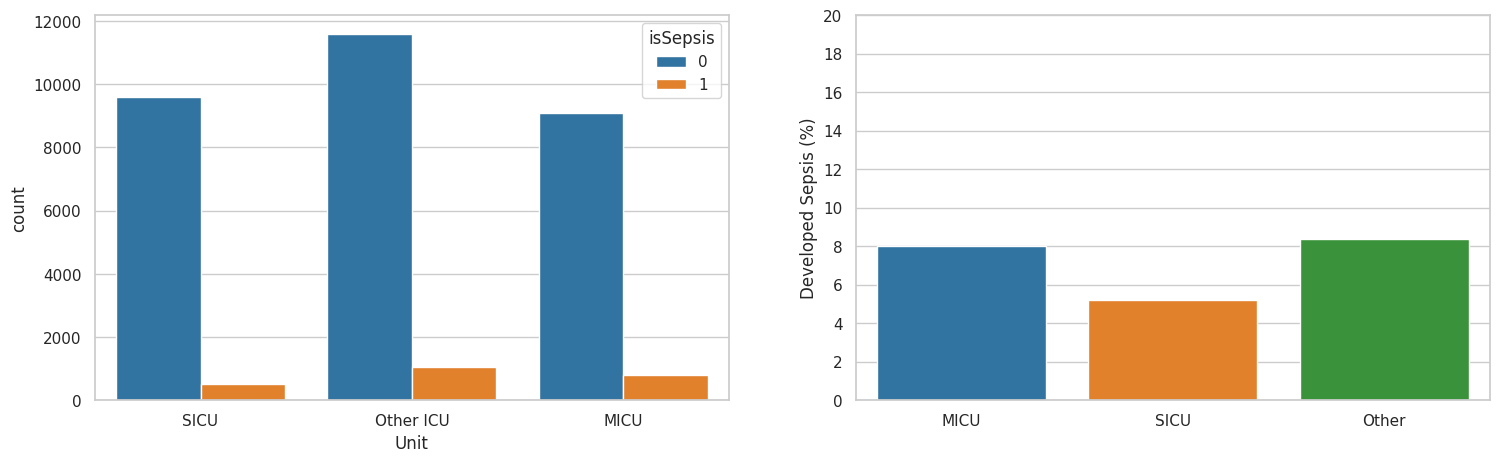

In [19]:
plt.figure(figsize = (18,5))
plt.subplot(1,2,1)
sns.countplot(data = CombineUnits(X_train.copy()), x = "Unit", hue = y_train)
plt.subplot(1,2,2)
plt.ylim([0,20])
plt.ylabel("Developed Sepsis (%)")
plt.yticks([i for i in range(0,21,2)])
sns.barplot(x = list(IsSeptic_shares.keys()), y = list(IsSeptic_shares.values()))

#plt.savefig("add2.png", dpi=400)

Not by much, but patients treated in surgical ICU had lower probability of developing sepsis. This feature may be useful for our model.